In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In [2]:
initial_data = yf.download("AXP", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,111.110001,113.989998,108.589996,113.870003,111.868332,9851600
2020-03-03,115.019997,116.400002,107.000000,108.010002,106.111351,9285000
2020-03-04,110.250000,115.790001,109.250000,115.699997,113.666161,7470900
2020-03-05,111.620003,112.589996,109.699997,110.940002,108.989838,12060600
2020-03-06,105.730003,108.769997,103.790001,108.239998,106.337288,9897700


In [4]:
initial_data['Adj Close'].head()

Date
2020-03-02    111.868332
2020-03-03    106.111351
2020-03-04    113.666161
2020-03-05    108.989838
2020-03-06    106.337288
Name: Adj Close, dtype: float64

In [5]:
data =  initial_data['Adj Close']

array([<AxesSubplot:xlabel='Date'>], dtype=object)

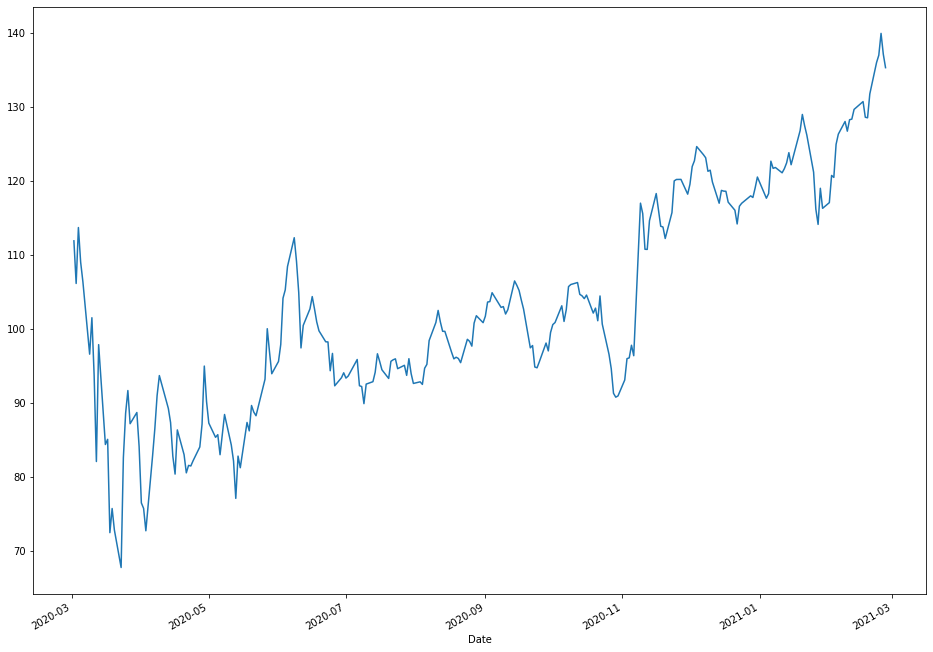

In [6]:
#Plotting the graph for the above time period
data.plot(figsize=(16, 12), subplots=True)

In [7]:
AXP = yf.download("AXP", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [8]:
S = AXP['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 135.26 .


In [9]:
log_return = np.log(AXP['Adj Close'] / AXP['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 63.35 %


In [10]:
AXP_6M = yf.download("AXP", start="2020-09-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [11]:
S = AXP_6M['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 135.26 .


In [12]:
log_return = np.log(AXP_6M['Adj Close'] / AXP_6M['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 41.49 %


In [13]:
vol = (63.36+41.49)/2

In [14]:
vol

52.425

In [15]:
#Monte Carlo Simulation
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [16]:
T = 4/52
r = 0.0145
sigma = 0.5242
S0 = 135.26
K = 130

In [17]:
S = mcs_simulation_np(1000)

In [18]:
S = np.transpose(S)
S

array([[135.26      , 135.32266155, 135.09062582, ..., 128.12425686,
        128.22230992, 128.67420659],
       [135.26      , 136.14623607, 137.01527948, ..., 143.95643274,
        143.54042884, 142.11572637],
       [135.26      , 135.44075116, 134.92576313, ..., 138.17213052,
        137.76254003, 139.07046228],
       ...,
       [135.26      , 135.25381638, 135.50926491, ..., 149.37770243,
        150.46183269, 152.38343305],
       [135.26      , 134.88912076, 135.50656192, ..., 130.10675553,
        130.28007141, 129.56720255],
       [135.26      , 135.15639306, 134.90011526, ..., 147.80460669,
        148.93822582, 148.73590649]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

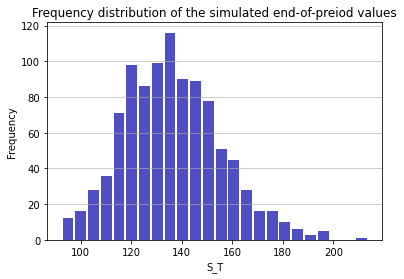

In [19]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [20]:
p = np.mean(np.where(K > S[:,-1],1,0))
print('Binary Put', str(p))

Binary Put 0.4


In [21]:
#Black Scholes Model

def binary_option_bsm(S, K, T, r, q, vol, payoff):
    
    #Sa: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [22]:
binary_option_bsm(135.26,130,4/52,0.0145,0,0.5242,'put')

0.41722772794474544

In [23]:
S = np.linspace(10,70,11)
pp = np.zeros((len(S),1))
for i in range(len(S)):
    pp[i] = binary_option_bsm(S[i],130,4/52,0.0145,0,0.5242,'put')

In [24]:
pp

array([[0.99888524],
       [0.99888524],
       [0.99888524],
       [0.99888524],
       [0.99888524],
       [0.99888524],
       [0.99888524],
       [0.99888524],
       [0.99888523],
       [0.99888485],
       [0.99887755]])

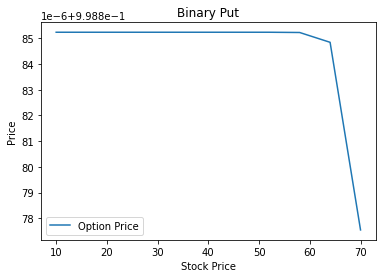

In [28]:
fig = plt.figure()
plt.plot(S, pp, '-')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('Binary Put')
plt.legend(['Option Price','Payoff at T'])

In [29]:
#Greeks

In [30]:
#DELTA

def delta(S,k,T,r,q,vol,payoff):
    d1 = (np.log(S/k) + (r + 0.5 * vol **2)*T)/(vol * np.sqrt(T))
    d2 = (np.log(S/k) + (r - 0.5 * vol **2)*T)/(vol * np.sqrt(T))
    
    if payoff == 'call':
        delta =  (np.exp(-r*T))*si.norm.pdf(d2,0.0,1.0)/(vol*S*np.sqrt(T))
    elif payoff == 'put':
        delta = -(np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))/(vol*S*np.sqrt(T))

    return delta

In [36]:
delta(135.26,130,4/52,0.0145,0,0.5242,'put')

-0.01983145228594208

In [41]:
S = np.linspace(50,150,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i],130,4/52,0.0145,0,0.5242,'put')

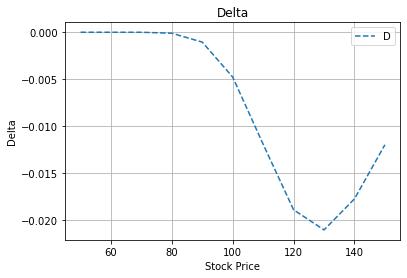

In [42]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend('Delta for Put')

In [39]:
#GAMMA

def gamma(S,k,T,r,q,vol,payoff):
    d1 = (np.log(S/k) + (r + 0.5 * vol **2)*T)/(vol * np.sqrt(T))
    d2 = (np.log(S/k) + (r - 0.5 * vol **2)*T)/(vol * np.sqrt(T))
    
    if payoff == 'call':
        gamma = (np.exp(-r*T)*d1*si.norm.pdf(d2,0.0,1.0))/((vol**2)*(S**2)*(T))
    elif payoff == 'put':
        gamma = -(np.exp(-r*T)*d1*si.norm.pdf(d2,0.0,1.0))/((vol**2)*(S**2)*(T))

    return gamma

In [40]:
gamma(135.26,130,4/52,0.0145,0,0.5242,'put')

-0.00035617375822560784

In [43]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],130,4/52,0.0145,0,0.5242,'put')

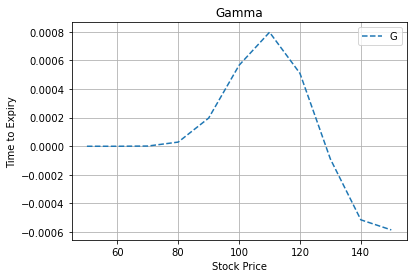

In [44]:
fig = plt.figure()
plt.plot(S, Gamma, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Time to Expiry')
plt.title('Gamma')
plt.legend('Gamma for Put')

In [45]:
#THETA

def theta(S0,k,T,r,q,vol,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * vol **2)*T)/(vol * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * vol **2)*T)/(vol * np.sqrt(T))
    a = d1/(2*T)
    b = (r-q)/(vol*np.sqrt(T))
    if payoff == 'call':
        theta = (r* np.exp(-r*T)*(si.norm.cdf(d2,0.0,1.0)))+(np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))* (a-b)
    elif payoff == 'put':
        theta = (r* np.exp(-r*T)*(1- si.norm.cdf(d2,0.0,1.0)))-(np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))* (a-b)

    return theta

In [46]:
theta(135.26,130,4/52,0.0145,0,0.5242,'put')

-0.8503474041954164

In [47]:
S = np.linspace(50,150,11)
Theta = np.zeros((len(S),1))
for i in range(len(S)):
    Theta [i] = theta(S[i],130,4/52,0.0145,0,0.5242,'put')

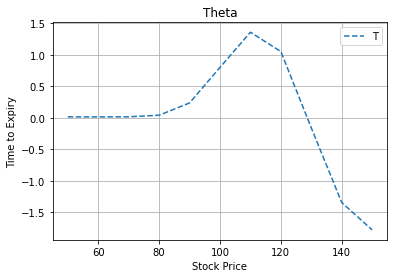

In [48]:
fig = plt.figure()
plt.plot(S, Theta, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Time to Expiry')
plt.title('Theta')
plt.legend('Theta for Put')

In [49]:
#SPEED

def speed(S0,k,T,r,q,vol,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * vol **2)*T)/(vol * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * vol **2)*T)/(vol * np.sqrt(T))
    a= (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0))/((vol**2)*(S0**3)*(T))
    b= ((-2*d1)+((1-(d1*d2))/(vol*np.sqrt(T))))
    
    if payoff == 'call':
        speed = -a*b
    elif payoff == 'put':
        speed = a*b

    return speed

In [50]:
speed(135.26,130,4/52,0.0145,0,0.5242,'put')

4.225186482614992e-05

In [51]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],130,4/52,0.0145,0,0.5242,'put')

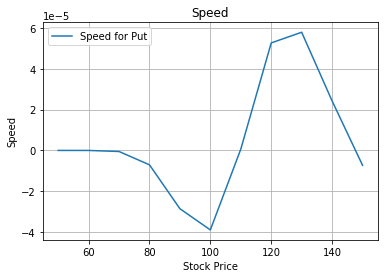

In [52]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [53]:
#RHO

def rho(S, K, T, r, q, vol, payoff):
    d1 = (np.log(S/K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S/K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho = K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = -K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [54]:
rho(135.26,130,4/52,0.0145,0,0.5242,'put')

-4.172277279447454

In [55]:
S = np.linspace(50,150,11)
Rho = np.zeros((len(S),1))
for i in range(len(S)):
    Rho [i] = rho(S[i], 130,4/52,0.0145,0,0.5242,'put')

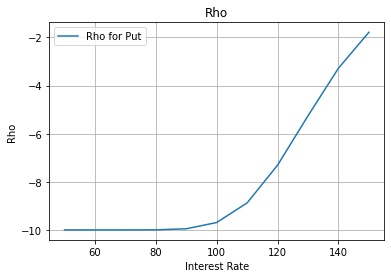

In [56]:
fig = plt.figure()
plt.plot(S, Rho, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [57]:
#VEGA

def vega(S0,k,T,r,q,sig,payoff):
    d1 = (np.log(S0/k) + (r + 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    d2 = (np.log(S0/k) + (r - 0.5 * sig **2)*T)/(sig * np.sqrt(T))
    a = (np.sqrt(T) + ((d2)/sig))   
    if payoff == 'call':
        vega = (-np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)) * a
    elif payoff == 'put':
        vega = (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)) * a
            
    return vega

In [58]:
vega(135.26,130,4/52,0.0145,0,0.5242,'put')

0.2627570330394931

In [59]:
S = np.linspace(50,150,11)
Vega = np.zeros((len(S),1))
for i in range(len(S)):
    Vega [i] = vega(S[i], 130,4/52,0.0145,0,0.5242,'put')

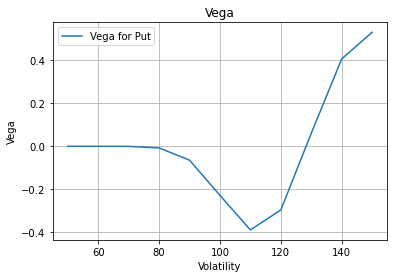

In [60]:
fig = plt.figure()
plt.plot(S, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])